<a href="https://colab.research.google.com/github/SouravG/self-organizing-map/blob/main/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt 
import networkx as nx

In [ ]:
maxEpochs = 10000
learning_rate = 0.1

In [ ]:
def winnerWeight(xi, W):
  euclidian = np.sqrt(np.sum((W-xi)**2,axis=1))
  return np.argmin(euclidian)

def deltaLearningRule(xi,wi):
  return np.matrix.round(learning_rate*(xi - wi),3)

def plotMap():
  plt.scatter(som[:,0],som[:,1]) 
  plt.xlabel('x - axis') 
  plt.ylabel('y - axis') 
  plt.title('Kononen Map') 
  plt.show()

In [ ]:
som = np.ndarray((10,10,2))
for i in range(10):
  for j in range(10):
    w1 = round(random.uniform(-1,1),3)
    w2 = round(random.uniform(-1,1),3)
    som[i][j] = [w1,w2]


In [ ]:
#training inputs
inputs = np.ndarray((1500,2))
for i in range(len(inputs)):
  for j in range(2):
    ip = round(random.uniform(-1,1),3)
    inputs[i][j] = ip

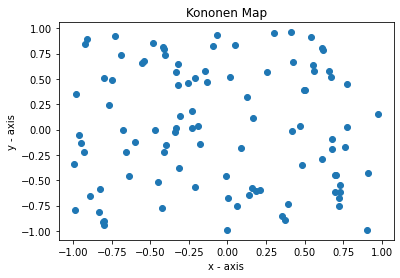

In [ ]:
#initial SOM
som = som.reshape((100,2))
plotMap()

In [ ]:
#training 
i,epochs = 1,0
while i:
  initialSOM = som.copy()
  epochs+=1
  for ip in inputs:
    ind = winnerWeight(ip,som)
    som[ind] += deltaLearningRule(ip,som[ind])
  if (initialSOM == som).all():
    i=0
  if epochs >= maxEpochs:
    break

print('epochs = ', epochs)

epochs =  10000


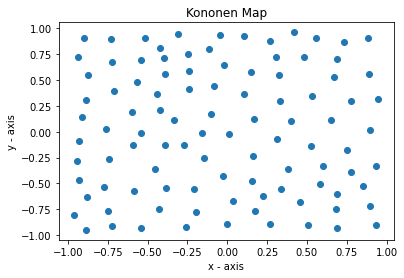

In [ ]:
#trained SOM
plotMap()

In [ ]:
# testing
X1 =[0.1, 0.8]
X2 =[0.5, -0.2]
X3 =[-0.8, -0.9]
X4 =[-0.6, 0.9]
test = [X1,X2,X3,X4]

In [ ]:
for ip in test:
  ind = winnerWeight(ip,som)
  r,c = int(ind/10),ind%10
  print('nearest neuron of', ip, 'is W', [r],[c], '=', som[ind])

nearest neuron of [0.1, 0.8] is W [3] [9] = [0.119 0.931]
nearest neuron of [0.5, -0.2] is W [3] [7] = [ 0.51  -0.145]
nearest neuron of [-0.8, -0.9] is W [8] [1] = [-0.879 -0.898]
nearest neuron of [-0.6, 0.9] is W [5] [0] = [-0.677  0.845]
